1B Build a logistic regression model 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("student_data.csv")

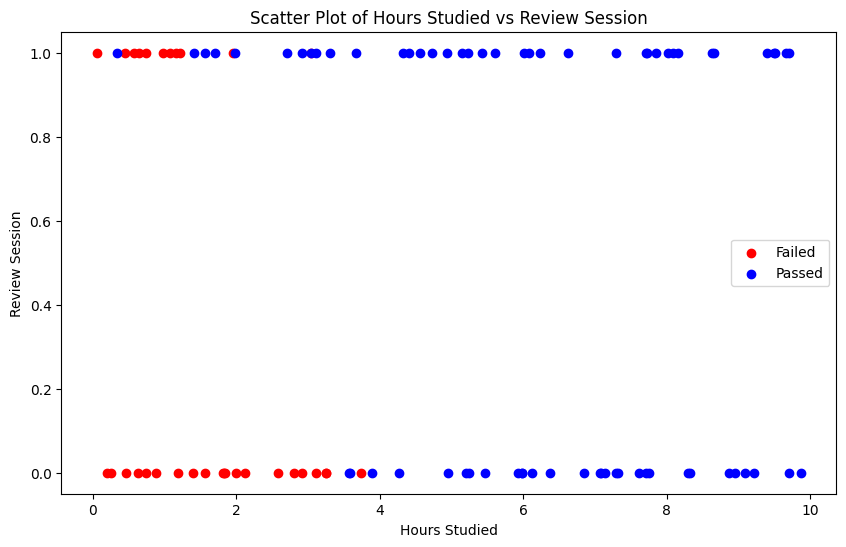

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Results'] == 0]['Hours_Studied'], data[data['Results'] == 0]['Review_Session'], color='red', label='Failed')
plt.scatter(data[data['Results'] == 1]['Hours_Studied'], data[data['Results'] == 1]['Review_Session'], color='blue', label='Passed')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.title('Scatter Plot of Hours Studied vs Review Session')
plt.legend()
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

# Prepare the data
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Output model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-4.61373892]
Coefficients: [[1.36542016 1.87797591]]


Accuracy: 0.93
AUC: 0.9761029411764706


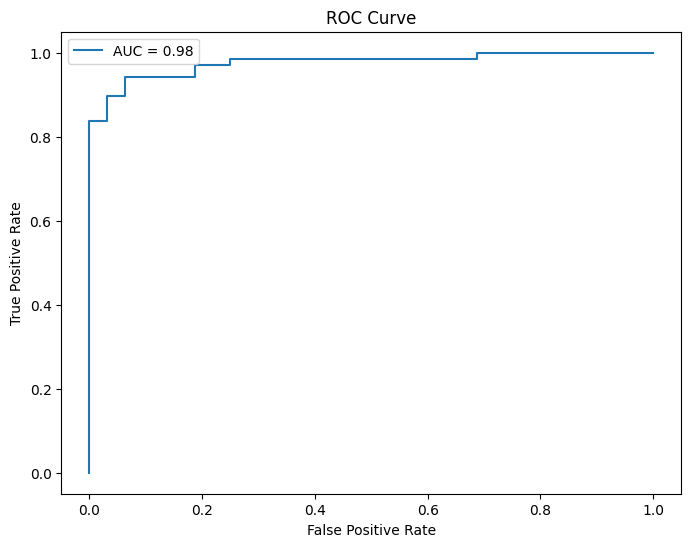

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Predictions
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)[:, 1]

# Calculate accuracy and AUC
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_pred_proba)

print("Accuracy:", accuracy)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

2 Understanding and Prevent Overfitting in the context of SVM 

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import make_classification
import numpy as np

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# 1. Fit SVM with linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)

# 2. Fit SVM with RBF kernel and perform grid search for gamma
parameters = {'gamma': [0.1, 1, 10, 100]}
rbf_svm = SVC(kernel='rbf')
grid_search = GridSearchCV(rbf_svm, parameters, cv=5)
grid_search.fit(X, y)

# Output the best gamma value found
best_gamma = grid_search.best_params_['gamma']
print("Best gamma:", best_gamma)

# Perform cross-validation using the best model from grid search
cv_results = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("Cross-validation scores:", cv_results)
print("Mean CV score:", np.mean(cv_results))

Best gamma: 0.1
Cross-validation scores: [0.95 0.95 1.   1.   1.  ]
Mean CV score: 0.9800000000000001
